# DNN Model

In [91]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [92]:
# data loading from .npz generated from tcr_data_process.ipynb
# loading train data
npz = np.load('data_train.npz')
train_inputs = npz['input'].astype(np.float64)
train_targets = npz['targets'].astype(np.float64)
# loading validation data
npz = np.load('data_validation.npz')
validation_inputs, validation_targets = npz['input'].astype(np.float64), npz['targets'].astype(np.float64)

npz = np.load('data_test.npz')
test_inputs, test_targets = npz['input'].astype(np.float64), npz['targets'].astype(np.float64)

# ANN Model

Outline, Optimizer, Loss function, Early stopping and Training rate

In [93]:
# NN model prep
input_size = 3
output_size = 1
hidden_layer_1_size = 5
hidden_layer_2_size = 5
hidden_layer_3_size = 5

model = tf.keras.Sequential([
    tf.keras.layers.Dense(input_size),
    tf.keras.layers.Dense(hidden_layer_1_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_2_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_3_size, activation='softmax'),
    tf.keras.layers.Dense(output_size, activation='linear')
])


In [94]:
# model prep, optimizer and loss function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer, loss=tf.keras.losses.MeanSquaredError(),metrics=[tf.keras.metrics.RootMeanSquaredError()])


In [95]:
# Training
BATCH_SIZE = 1
MAX_EPOCHS = 1000
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

In [96]:
# fit the model
history = model.fit(
    train_inputs, train_targets, batch_size=BATCH_SIZE,epochs=MAX_EPOCHS, callbacks=[early_stopping], validation_data=(validation_inputs, validation_targets), verbose=2
          )

Epoch 1/1000
102/102 - 2s - loss: 0.6169 - root_mean_squared_error: 0.7855 - val_loss: 0.5930 - val_root_mean_squared_error: 0.7700 - 2s/epoch - 20ms/step
Epoch 2/1000
102/102 - 0s - loss: 0.5708 - root_mean_squared_error: 0.7555 - val_loss: 0.5474 - val_root_mean_squared_error: 0.7398 - 352ms/epoch - 3ms/step
Epoch 3/1000
102/102 - 0s - loss: 0.5267 - root_mean_squared_error: 0.7257 - val_loss: 0.5039 - val_root_mean_squared_error: 0.7099 - 327ms/epoch - 3ms/step
Epoch 4/1000
102/102 - 1s - loss: 0.4845 - root_mean_squared_error: 0.6961 - val_loss: 0.4623 - val_root_mean_squared_error: 0.6799 - 581ms/epoch - 6ms/step
Epoch 5/1000
102/102 - 0s - loss: 0.4442 - root_mean_squared_error: 0.6665 - val_loss: 0.4225 - val_root_mean_squared_error: 0.6500 - 349ms/epoch - 3ms/step
Epoch 6/1000
102/102 - 0s - loss: 0.4056 - root_mean_squared_error: 0.6369 - val_loss: 0.3845 - val_root_mean_squared_error: 0.6201 - 494ms/epoch - 5ms/step
Epoch 7/1000
102/102 - 1s - loss: 0.3690 - root_mean_squared

In [97]:
# ANN model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (1, 3)                    12        
                                                                 
 dense_31 (Dense)            (1, 5)                    20        
                                                                 
 dense_32 (Dense)            (1, 5)                    30        
                                                                 
 dense_33 (Dense)            (1, 5)                    30        
                                                                 
 dense_34 (Dense)            (1, 1)                    6         
                                                                 
Total params: 98
Trainable params: 98
Non-trainable params: 0
_________________________________________________________________


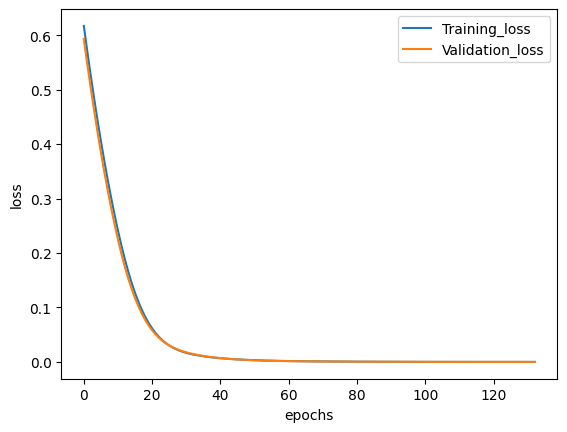

In [98]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training_loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Model check on Test data

In [99]:
test_loss, test_accuracy = model.evaluate(test_inputs, test_targets)

1/1 [==============================] - 1s 557ms/step - loss: 4.0013e-05 - root_mean_squared_error: 0.0063


In [100]:
print('\nTest loss: {0:.4f}. Test accuracy: {1:.4f} rmse'.format(test_loss, test_accuracy))


Test loss: 0.0000. Test accuracy: 0.0063 rmse


In [101]:
prediction = model.predict(test_inputs)
data_inputs = pd.DataFrame(test_inputs)
prediction = pd.DataFrame(prediction)
test_targets = pd.DataFrame(test_targets)
pred_accu = (prediction/test_targets)*100
pred_accu_avg = pred_accu.sum()/pred_accu.shape[0]

result = pd.concat([test_targets, prediction, pred_accu], axis = 1, ignore_index=True)
result.columns = ['Target-St(%)', 'Prediction-St(%)','prediction-accuracy(%)']
result

1/1 [==============================] - 0s 117ms/step


,Target-St(%),Prediction-St(%),prediction-accuracy(%)
0,0.939463,0.934516,99.473390
1,0.939397,0.934516,99.480451
2,0.950768,0.966461,101.650528
3,0.979012,0.978456,99.943242
4,0.983239,0.975934,99.257014
5,0.970551,0.970074,99.950872
6,0.966854,0.970074,100.333024
7,0.977105,0.966461,98.910649
8,0.984452,0.989824,100.545682
9,0.971389,0.972335,100.097358


In [102]:
# estimation of R2 score
from sklearn.metrics import r2_score
r2_score_test = r2_score(test_targets, prediction)
r2_score_test

0.8926133991411751

In [103]:
# estimation of adjusted R2 score
n = np.size(test_targets)
k = 3 # number of features
adj_r2_score = 1 - (((1-r2_score_test)*(n-1))/((n-k-1)))
adj_r2_score

0.8568178655215668

In [104]:
uncertainty_model = abs(pred_accu_avg-100) 
print("Uncertainty of the ANN model:", np.round(uncertainty_model[0],2), '[%]')
print("Average test prediction precision", np.round(100 - uncertainty_model[0],2), '[%]')

Uncertainty of the ANN model: 0.01 [%]
Average test prediction precision 99.99 [%]


# ANN Model Deployment

ANN model deployment for micro DSC error prediction

In [105]:
import keras
model.save('micro_dsc_dl.h5')